In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
import subprocess
from scipy.stats import norm
from scipy import interpolate
%matplotlib inline
import os

In [25]:

list_name=['LCol', 'HCol', 'BCol', 'coverCol', 'barAreaTop', 'fc', 'Ec', 'Fy', 'Es', 'P']
list_mean = [6.0, 1.5, 1.2, 0.06, 1.4516, 27.0, 25.0, 460, 200, 0.75]
list_scale = [1.0, 1, 1, 1, 1E-3, -1E6, 1.0E9, 1E6, 1E9, 1E6]
list_cov = [20, 20, 20, 20, 20, 20, 20, 20, 20, 10]
list_type = ['log', 'log','log', 'log', 'log', 'normal', 'normal', 'log', 'log', 'normal']
list_std = np.array(list_mean)/ np.array(list_cov)

In [26]:
Nsample = 100000

# No need to change
dict_variable = {}
for i, name in enumerate(list_name):
    if list_type[i] == 'normal':
        xx = np.random.normal(list_mean[i], list_mean[i]/list_cov[i], Nsample)
    elif list_type[i] == 'log':
        mean = list_mean[i]
        std =  list_std[i]
        sigmal = np.sqrt(np.log(std**2/mean**2 + 1))
        mu = np.log(mean) - sigmal**2/2
        xx = np.random.lognormal(mu, sigmal, Nsample)

    dict_variable[name] = xx * list_scale[i]       
        
dict_variable['id'] = list(range(Nsample))
df = pd.DataFrame.from_dict(dict_variable) 

In [27]:
df.head()

,LCol,HCol,BCol,coverCol,barAreaTop,fc,Ec,Fy,Es,P,id
0,6.470589,1.446092,1.099409,0.062476,0.001495,-2.568421e+07,2.658992e+10,4.641490e+08,1.955834e+11,697385.555207,0
1,5.965273,1.464021,1.199771,0.061787,0.001407,-2.744141e+07,2.553596e+10,4.326566e+08,1.877873e+11,779832.504658,1
2,6.103964,1.545049,1.194561,0.057659,0.001393,-2.610261e+07,2.244694e+10,4.896893e+08,2.060969e+11,693235.712978,2
3,5.686435,1.545789,1.216454,0.053344,0.001307,-2.722699e+07,2.327111e+10,4.336217e+08,1.984635e+11,765728.997957,3
4,6.352050,1.507667,1.127501,0.056393,0.001346,-2.438527e+07,2.264225e+10,4.866478e+08,1.786315e+11,712066.557404,4


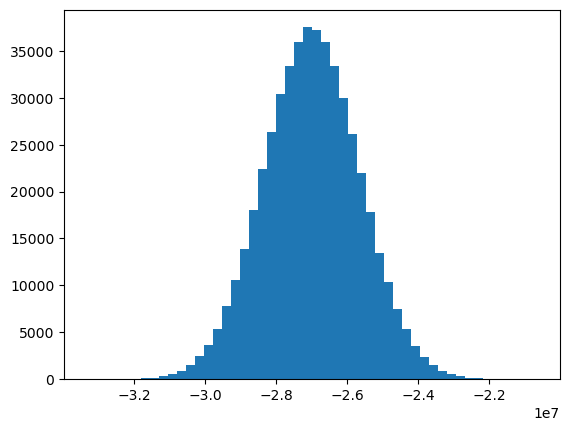

In [30]:
plt.hist(df['fc'], bins=50);

In [29]:
def gen_tcl(X, fname = 'base.tcl', fout='id_'):
    list_key = ['LCol', 'HCol', 'BCol', 'coverCol', 'barAreaTop', 'fc', 'Ec', 'Fy', 'Es']            
    with open(fname, 'r') as f:
        file = f.readlines()
        for i, line in enumerate(file):        
            for j, k in enumerate(list_key):                      
                if f'set {k} ' in line:
                    file[i] = f'set {k} {X[j]}\n'

            if 'recorder Node' in line:
                file[i] = f'recorder Node -file {fout}disp_{int(X[-1])}.txt -time -node 2 -dof 1 disp\n'
                
                
    # No need to change                                
    with open(fout + f'{int(X[-1])}.tcl', 'w') as fw:
        fw.writelines(file)
        fw.close()        
              
    
    return None

In [32]:
%%time
fin ='ex_1.tcl'    
fout='ex_1/id_'

# No need to change
for i in range(100):
    if i%5000==0:
        print(i)
    X = df.iloc[i].values
    gen_tcl(X, fname = fin, fout=fout)
    subprocess.run(f"Opensees {fout}{i}.tcl")

    

0
CPU times: total: 578 ms
Wall time: 13.1 s
